Found file: scraped_data/trends_tracking_2024-07-08_15-11.json
Found file: scraped_data/trends_tracking_2024-07-08_18-58.json
Found file: scraped_data/trends_tracking_2024-07-08_23-11.json
Found file: scraped_data/trends_tracking_2024-07-09_13-40.json
Found file: scraped_data/trends_tracking_2024-07-09_21-54.json
Found file: scraped_data/trends_tracking_2024-07-10_12-28.json


<Figure size 1200x800 with 0 Axes>

c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


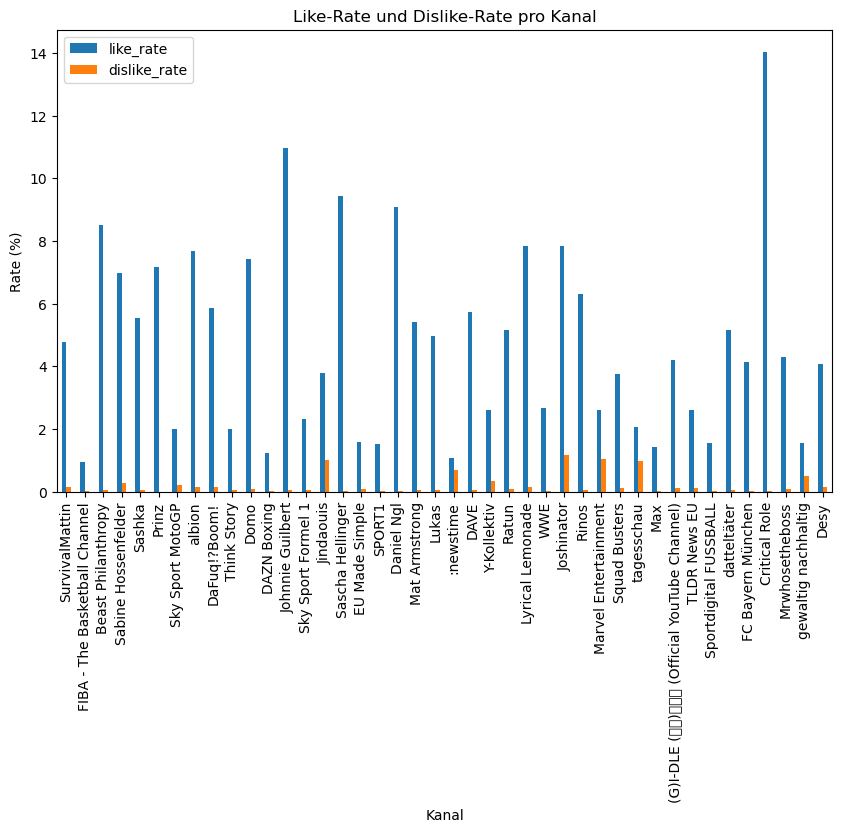

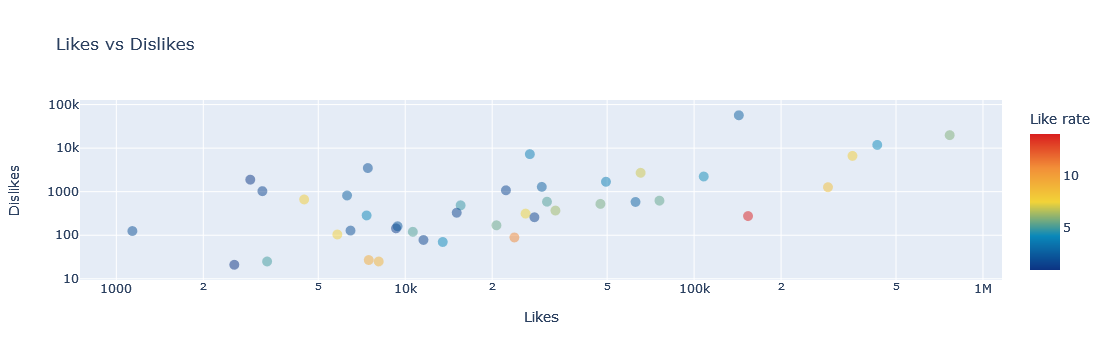

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.font_manager as fm

# lädt alle datein in '/scraped_data' und fügt die Datensätze in eine Liste zusammen
def load_data_from_folder(folder_path):
    all_videos = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
                print(f'Found file: {file_path}')
                if isinstance(data, dict):
                    videos = data.get('videos', [])
                    if isinstance(videos, list):
                        all_videos.extend(videos)
                elif isinstance(data, list):
                    all_videos.extend(data)
    return all_videos

# entfernt duplikate der gescraped Videos und behält die, die am neusten sind
def remove_duplicates(videos):
    seen = set()
    unique_videos = []
    for video in reversed(videos):
        video_url = video.get('video_url')
        if video_url not in seen:
            unique_videos.append(video)
            seen.add(video_url)
    return list(reversed(unique_videos))

# bereinigt die Daten und führt die Berechnungen aus
def calculate_rates(videos):
    for video in videos:
        if '.' in video['views']:
            video['views'] = int(video['views'].replace('.', '').replace(' ', ''))
        else:
            video['views'] = int(video['views'].replace(' ', ''))
        
        video['likes'] = int(video['likes'].replace('.', ''))
        video['dislikes'] = int(video['dislikes'].replace('.', ''))
        
        video['like_rate'] = round((video['likes'] / video['views']) * 100, 2)
        video['dislike_rate'] = round((video['dislikes'] / video['views']) * 100, 2)


# erstellt die Plots
def generate_plots(df):
    
    # plt.rcParams['font.family'] = 'Roboto'
    plt.figure(figsize=(12, 8))
    df.plot(x='channel', y=['like_rate', 'dislike_rate'], kind='bar', figsize=(10, 6))
    plt.title('Like-Rate und Dislike-Rate pro Kanal')
    plt.xlabel('Kanal')
    plt.ylabel('Rate (%)')
    plt.show()

    fig = px.scatter(df, x='likes', y='dislikes', size='views', hover_name='channel',
                    hover_data={'channel': False, 'title': True, 'likes': True, 'dislikes': True, 'views': True, 'subs': True, 'comments': True},
                    color='like_rate', 
                    color_continuous_scale='portland', 
                    title='Likes vs Dislikes',
                    labels={'title': 'Title', 'likes': 'Likes', 'dislikes': 'Dislikes', 'views': 'Views', 'comments': 'Comments', 'subs': 'Subs', 'like_rate': 'Like rate'},
                    log_x=True, log_y=True)

    # fig.update_layout(font=dict(family='Roboto', size=12))
    fig.update_traces(marker=dict(size=10, opacity=0.5))
    fig.update_layout(hovermode='closest')

    fig.show()

def main():
    folder_path = 'scraped_data/'
    all_videos = load_data_from_folder(folder_path)
    
    all_videos = remove_duplicates(all_videos)
    calculate_rates(all_videos)
    
    df = pd.DataFrame(all_videos)
    generate_plots(df)

if __name__ == '__main__':
    main()
